# Принятие решений в бизнесе на основе данных

В крупном интернет-магазине совместно с отделом маркетинга необходимо проверить сформулированные гипотезы, запустить A/B-тест и проанализировать результаты

# Описание данных
Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.\

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.\

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Цель исследования - выявить наиболее потенциально эффективные гипотезы и принять решение по результатам А/В-теста.

# Задачи 

1) Применить фреймворк ICE и RICE для приоритизации гипотез и сравнить результат.  
2) Построить/посчитать:  
    - график кумулятивной выручки по группам;  
    - график кумулятивного среднего чека по группам;  
    - график относительного изменения кумулятивного среднего чека группы B к группе A;  
    - график кумулятивного среднего количества заказов на посетителя по группам;  
    - график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;  
    - точечный график количества заказов по пользователям;  
    - 95-й и 99-й перцентили количества заказов на пользователя и выбрать границу для определения аномальных заказов;  
    - точечный график стоимостей заказов;  
    - 95-й и 99-й перцентили стоимости заказов и выбрать границу для определения аномальных заказов;  
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;  
    - статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;  
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;  
    - статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;  
3) Принять решение по результатам теста и объяснить его. Варианты решений:  
    1. Остановить тест, зафиксировать победу одной из групп.  
    2. Остановить тест, зафиксировать отсутствие различий между группами.  
    3. Продолжить тест.  

<div class="alert alert-info"> <b>Комментарий студента:</b> ✔</div>

## Изучение данных

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
h_pth1 = 'C://Users/drweb/Downloads/hypothesis.csv'
h_pth2 = '/datasets/hypothesis.csv'

if os.path.exists(h_pth1):
    hypothesis = pd.read_csv(h_pth1)
elif os.path.exists(h_pth2):
    hypothesis = pd.read_csv(h_pth2)
else:
    print('Something is wrong')

In [3]:
o_pth1 = 'C://Users/drweb/Downloads/orders.csv'
o_pth2 = '/datasets/orders.csv'

if os.path.exists(o_pth1):
    orders = pd.read_csv(o_pth1)
elif os.path.exists(o_pth2):
    orders = pd.read_csv(o_pth2)
else:
    print('Something is wrong')

In [4]:
v_pth1 = 'C://Users/drweb/Downloads/visitors.csv'
v_pth2 = '/datasets/visitors.csv'

if os.path.exists(v_pth1):
    visitors = pd.read_csv(v_pth1)
elif os.path.exists(v_pth2):
    visitors = pd.read_csv(v_pth2)
else:
    print('Something is wrong')

In [5]:
def func(x):
    display(x.head())
    print('*'*50)
    x.info()
    print('*'*50)
    print(f" Количество дубликатов в датафрейме: {x.duplicated().sum()}")

In [6]:
func(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
**************************************************
 Количество дубликатов в датафрейме: 0


Приведём названия столбцов к змеиному стилю

In [7]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [8]:
func(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************
 Количество дубликатов в датафрейме: 0


In [9]:
orders.columns = [x.lower() for x in orders.columns]
orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'}, inplace=True)

Приведём дату к необходимому типу данных

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Узнаем анализируемый период

In [11]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [12]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Таким образом, рассматриваемый период составляет 1 месяц: 01.08.2019 - 31.08.2019

Посмотрим, сколько всего пользователей и заказов по группам

In [13]:
orders_grouped = orders.groupby('group').agg({'transaction_id':'nunique', 'visitor_id':'nunique'})
orders_grouped.columns = ['orders', 'visitors']
orders_grouped

,orders,visitors
group,,
A,557,503
B,640,586


Всего 2 группы, кол-во пользователей и заказов в группах примерно одинаково

Посмотрим, есть ли пользователи, которые попадают в обе группы

In [14]:
double_users = orders.groupby('visitor_id').agg({'group' : 'nunique'})\
.reset_index().query('group > 1')['visitor_id'].unique()
double_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

Удалим их из датафрейма

In [15]:
orders = orders.query('visitor_id not in @double_users')

In [16]:
func(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************
 Количество дубликатов в датафрейме: 0


Приведём дату к необходимому типу данных

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим не отличается ли период от датафрейма с заказами orders

In [18]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [19]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Посмотрим на динамику посетителей по дням по группам

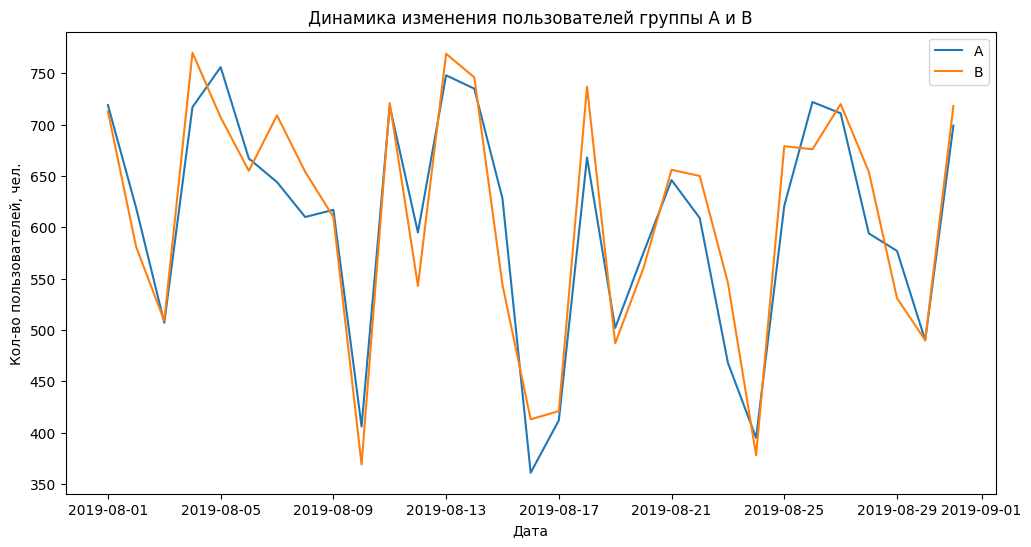

In [20]:
visitors_a = visitors.query('group == "A"')
visitors_b = visitors.query('group == "B"')

plt.figure(figsize=(12,6))
plt.plot(visitors_a['date'], visitors_a['visitors'], label = 'A')
plt.plot(visitors_b['date'], visitors_b['visitors'], label = 'B')
plt.title('Динамика изменения пользователей группы А и B')
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей, чел.')
plt.legend()
plt.show()

**Вывод: пропуски и дубликаты отсутствуют, названия столбцов представлены в необходимом стиле, столбцы приведены к необходимым типам данных. Пользователи, попавшие в обе группы, ликвидированы. Динамика изменений пользователей у обеих групп похожа.\
Данные готовы к анализу.**

## Приоритизация гипотез

In [21]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез

In [22]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез

In [23]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


### Сравнение приоритизации гипотез в разрезе показателей ICE и RICE

In [24]:
# определим числовые столбцы для визуализации
numeric_columns = ['reach', 'impact', 'confidence', 'efforts', 'ICE', 'RICE']
hypothesis.sort_values(by='RICE', ascending=False)\
.style.background_gradient(cmap='RdYlGn')

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


**Вывод:
Приоритизация гипотез в зависимости от показателя (ICE или RICE) меняется.\
Так, главенстующей гипотезой по методу ICE является ***запуск акции, дающую скидку на товар в день рождения***.\
По методу RICE главенствует ***добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок***.\
Параметр ICE является более субъективным и абстрактным, тогда как RICE дополнительно показывает предполагаемый охват от акции, что делает показатель более объективным.
Рекомендуется больше внимания уделить гипотезам, главенствующим по параметру RICE, однако не стоит пренебрегать и распределение гипотез по параметру ICE. Так, вполне жизнеспособной может, к примеру, оказаться гипотеза о ***запуске акции на скидку на день рождения***, несмотря на то, что охват у неё невысок, к тому же трудозатраты у этого действия будут не так велики, как, к примеру, ***запуск собственной службы доставки***.
Совершенно точно не стоит тестировать гипотезы, у которых низкие показатели как ICE, так и RICE.**

## Анализ A/B-теста

### График кумулятивной выручки по группам 

Массив уникальных пар значений дат и групп теста

In [25]:
dates_groups = orders[['date', 'group']].drop_duplicates()

Агрегированные кумулятивные по дням данные о заказах

In [26]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                      orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'visitor_id':'nunique', 'transaction_id':'nunique', 'revenue':'sum'}), axis = 1)\
.sort_values(by=['date', 'group'])

Агрегированные кумулятивные по дням данные о посетителях

In [27]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                      visitors['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)\
.sort_values(by=['date', 'group'])

Создадим датафрейм с кумулятивной выручкой

In [28]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on = ['date','group'], right_on = ['date','group'])
cumulative_data.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']

In [29]:
cumulative_data

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,19,23,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,36,42,234381,1338
3,2019-08-02,B,39,40,221801,1294
4,2019-08-03,A,60,66,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,490,510,4746610,17708
58,2019-08-30,A,437,460,3311413,18037
59,2019-08-30,B,511,531,4955833,18198
60,2019-08-31,A,445,468,3364656,18736


Проверим, совпадают ли мин. и макс. значения дат в этом датафрейме

In [30]:
cumulative_data['date'].min()

Timestamp('2019-08-01 00:00:00')

In [31]:
cumulative_data['date'].max()

Timestamp('2019-08-31 00:00:00')

Создадим датафрейм с выручкой по группе А

In [32]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

Создадим датафрейм с выручкой по группе B

In [33]:
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

Построим графики кумулятивной выручки по группам

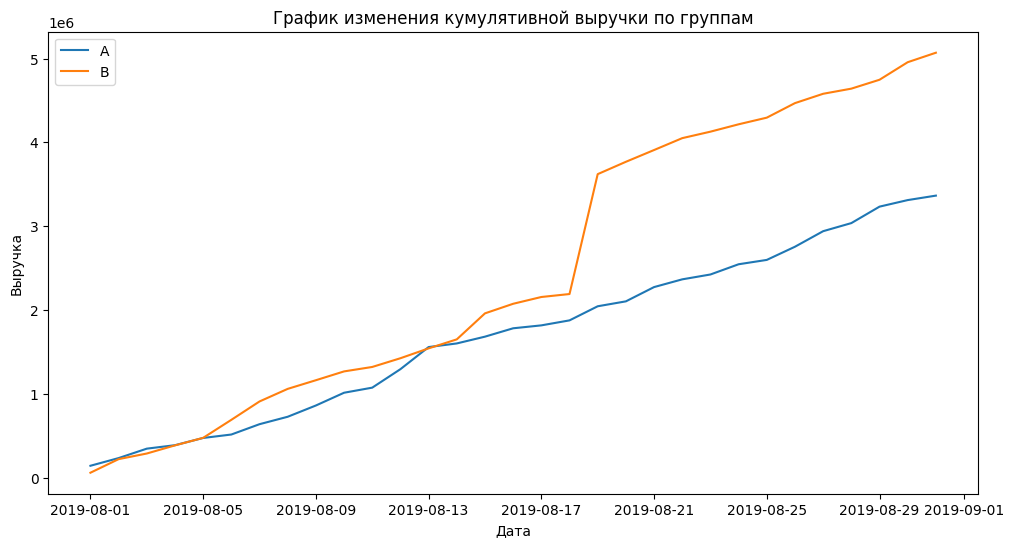

In [34]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label = 'A',)
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label = 'B')
plt.title('График изменения кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

**Вывод: выручка равномерно увеличивается до определенного периода. Так, после 2019.08.17 у группы B произошёл резкий рост выручки.\
Это может сигнализировать об увеличении кол-ва заказов, либо о появлении дорогих заказов.**

### График кумулятивного среднего чека по группам

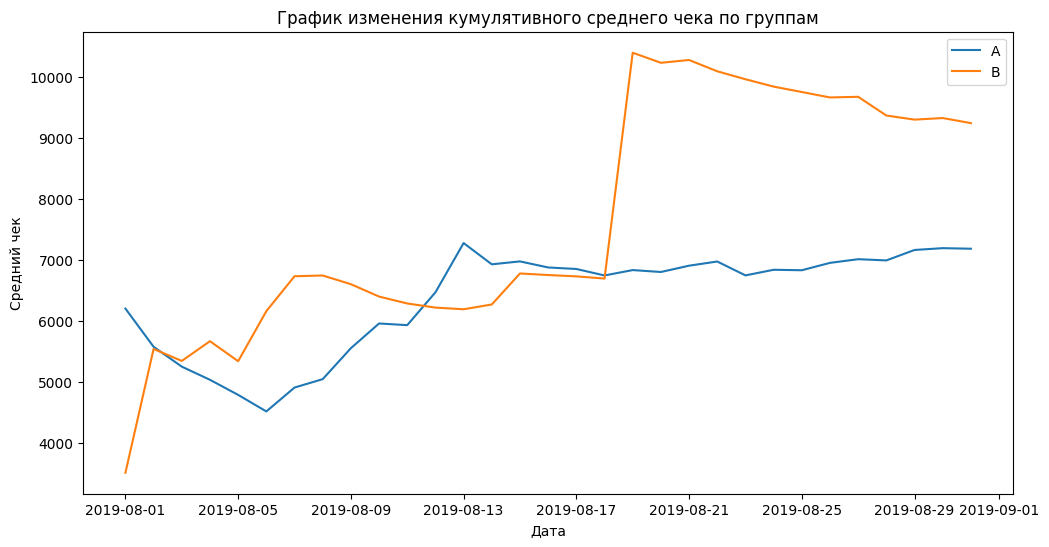

In [35]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label = 'B')
plt.title('График изменения кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

**Вывод: В определенный момент для группы B резко вырос показатель среднего чека, при этом к концу периода он сохранился примерно на одинаковом уровне, показав лишь небольщшое снижение. Это может сигнализировать о поднятии цен на определённые категории товаров. Непонятно, сравняются ли в итоге показатели средней выручки. Возможно, необходимо дальнейшее наблюдение.\
    Стоит отметить динамику среднего чека для группы А: с начала периода до примерно 6 августа показатель падает, затем, вплоть до 14 августа растёт, где достигает своего пика, после чего стабилизируется.\
    Также стоит отметить схожесть снижений среднего чека для групп А и В 6 и 5 августа соответственно. Вероятно, 5 августа на группе В была опробована неудачная акция, которая привела к резкому снижению среднего чека, а на следюущий день, 6 августа, такая же акция была проведена с группой А.**

### График относительного изменения кумулятивного среднего чека группы B к группе A

Создадим датафрейм с кумулятивной выручкой по обоим группам

In [36]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график 

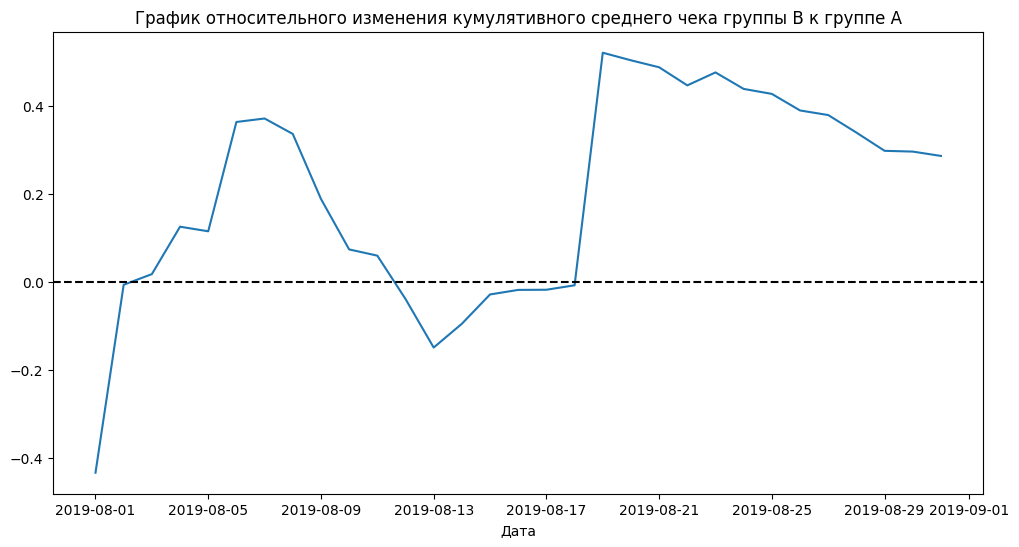

In [37]:
plt.figure(figsize=(12,6))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])\
/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')

**Вывод: в некоторых места график сильно "скачет", что может сигнализировать о крупных заказах, выбросах.**

### График кумулятивного среднего количества заказов на посетителя по группам

Найдем среднее кол-во заказов на посетителя и разделим датафрейм по группам

In [38]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [39]:
cumulative_data_a = cumulative_data.query('group == "A"')
cumulative_data_b = cumulative_data.query('group == "B"')

Построим графики

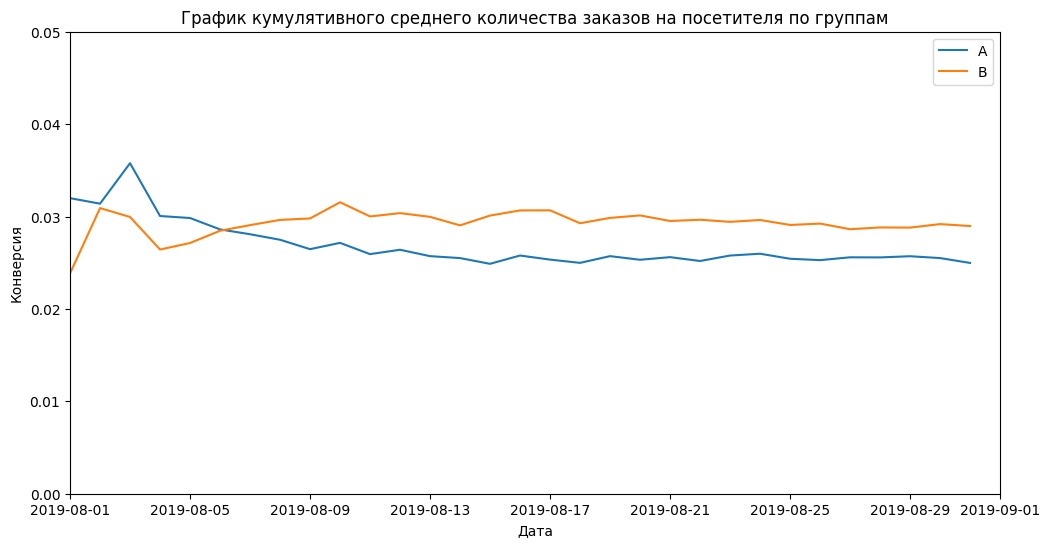

In [40]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label = 'B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

**Вывод: по данному графику после 5 августа группа В вырвалась вперёд и зафиксировалось, группа А "просела", а затем зафиксировалась.**

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [41]:
merged_cumulative_conversion = (cumulative_data_a[['date', 'conversion']]
                                .merge(cumulative_data_b[['date', 'conversion']]
                                       , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                               )

Построим график

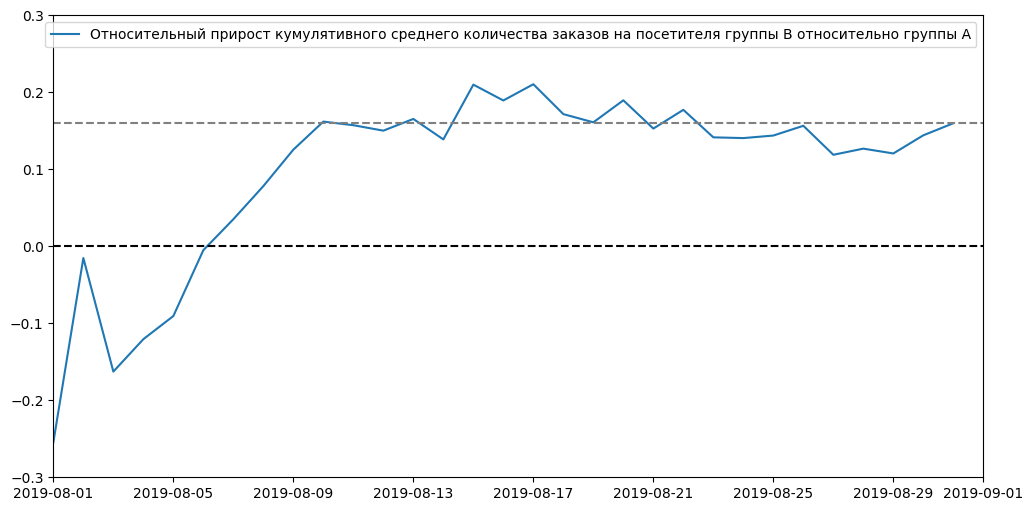

In [42]:
plt.figure(figsize=(12,6))
plt.plot(merged_cumulative_conversion['date'], merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1,\
        label = 'Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])
plt.show()

**Вывод: изначально группа В проигрывала группе А, однако после 5 августа она стремительно вырвалась вперёд, в последующем происходило постепенное снижение показателя, а затем снова наметился медленный рост.**

### Точечный график количества заказов по пользователям

Соединим датафреймы orders и visitors

In [43]:
df = orders.merge(visitors, left_on=['date', 'group'], right_on=['date', 'group'], how='right')

In [44]:
df

,transaction_id,visitor_id,date,revenue,group,visitors
0,1144701458,1143609305,2019-08-01,2750,A,719
1,477940151,1422773200,2019-08-01,700,A,719
2,1295850747,2947100995,2019-08-01,29499,A,719
3,1170105516,2706377257,2019-08-01,9024,A,719
4,1962247337,2706377257,2019-08-01,7129,A,719
...,...,...,...,...,...,...
1011,2886170101,930758570,2019-08-31,6674,B,718
1012,3845118557,1964413493,2019-08-31,160,B,718
1013,853409662,1390677121,2019-08-31,18557,B,718
1014,4149581711,1555048873,2019-08-31,1830,B,718


In [45]:
orders_by_users = df.groupby('visitor_id',  as_index=False).agg({'transaction_id':'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


Построим точечный график

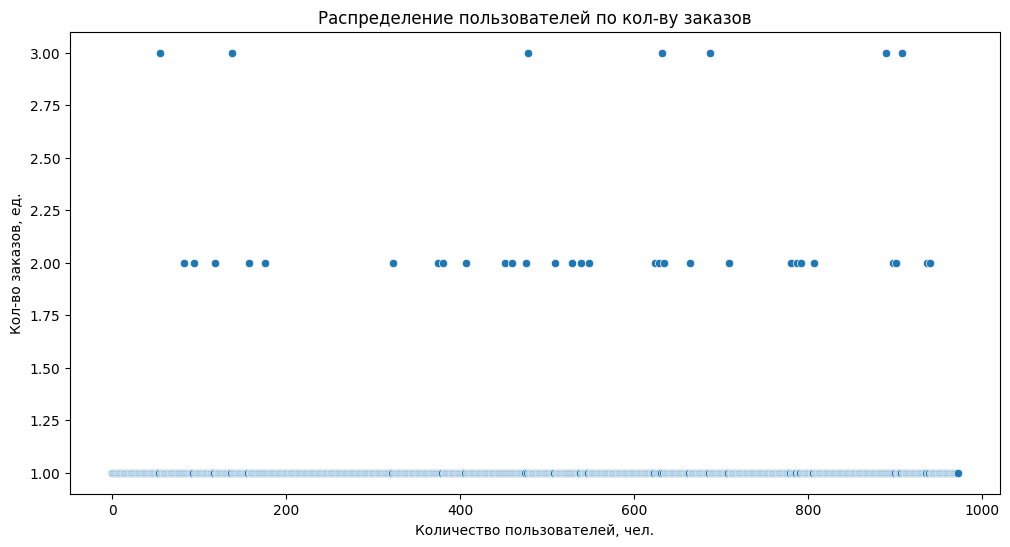

In [46]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(12,6))
sns.scatterplot(data = orders_by_users, x = x_values, y = orders_by_users['orders'])
plt.title('Распределение пользователей по кол-ву заказов')
plt.xlabel('Количество пользователей, чел.')
plt.ylabel('Кол-во заказов, ед.')
plt.show()

**Вывод:**
- больше 3-х заказов никто не заказывал;
- подавляющее большинство посетителей заказало 1 заказ.

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных заказов.

In [47]:
display(np.percentile(orders_by_users['orders'], [95, 99]))

array([1., 2.])

**Вывод: таким образом, 95% пользователей заказывали не более 1 заказа, 99% - не более 2.\
Отметим границу аномальных значений - 2 заказа (99 %)**

### Точечный график стоимостей заказов

Определим значения х для графика

Text(0.5, 0, 'Кол-во пользователей, чел.')

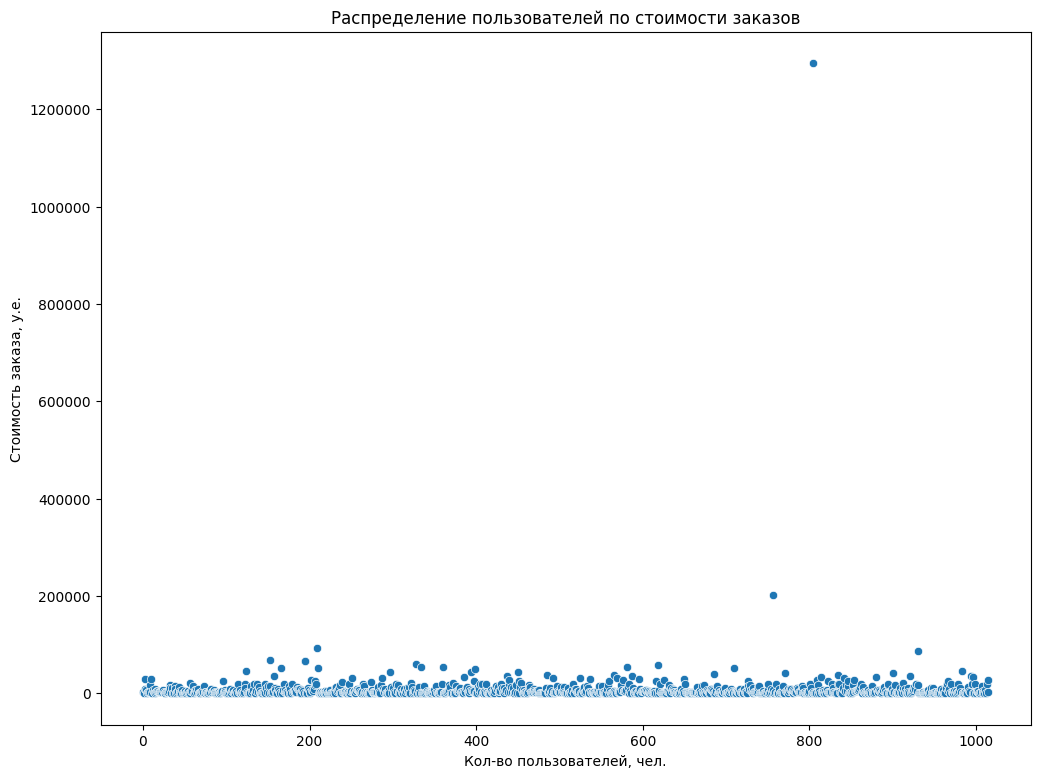

In [48]:
x_values = pd.Series(range(0,len(df['revenue'])))

plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')
sns.scatterplot(x = x_values, y = df['revenue'])
plt.title('Распределение пользователей по стоимости заказов')
plt.ylabel('Стоимость заказа, у.е.')
plt.xlabel('Кол-во пользователей, чел.')

Построим отдельный график для расмотрения основног распределения

Text(0, 0.5, 'Кол-во пользователей, чел.')

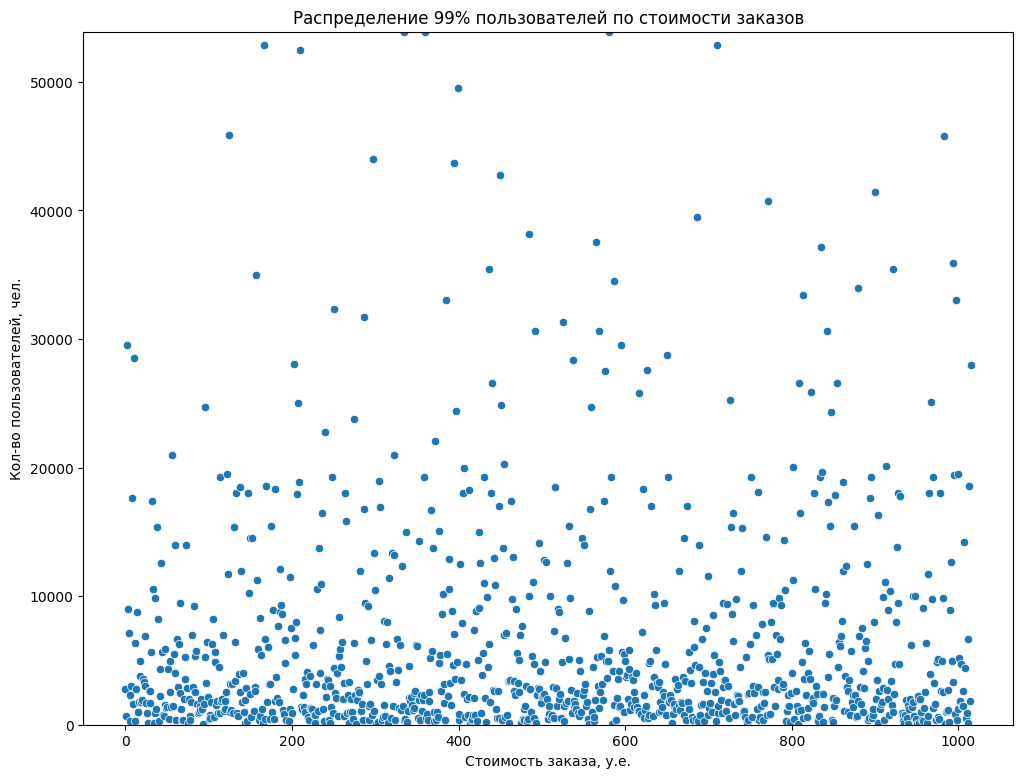

In [49]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = x_values, y = df['revenue'])
plt.title('Распределение 99% пользователей по стоимости заказов')
plt.ylim(0, 53904)
plt.xlabel('Стоимость заказа, у.е.')
plt.ylabel('Кол-во пользователей, чел.')

**Вывод: аномально дорогие заказы почти отсутствуют, отображено лишь 2 выброса, выбивающихся из общей картины. Основная масса заказов представлено суммой до 10 000 у.е., присутствует также значительное кол-во заказов до 20 000 у.е., выше этой отметки заказов мало.**

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [50]:
np.percentile(df['revenue'], [95,99])

array([26785., 53904.])

**Вывод: определим верхнюю границу аномальных значений в 99%, а именно стоимостью в 53 904 у.е.**

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Подготовим данные к анализу

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (
    visitorsADaily.merge(
        visitorsBDaily, left_on='date', right_on='date', how='left') 
       )

display(data.head(5))

,date,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


Создадим переменные с кол-вом заказов на пользователя по группам

In [52]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов

In [53]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [54]:
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Выдвинем гипотезы:\
Н0: статистически значимых различий в среднем числе заказов между группами нет\
Н1: статистически значимые различия в среднем числе заказов между группами присутствуют**

Поделим сумму заказов на число пользователей — найдём среднее в выборке sample_a методом mean(). Аналогично найдём среднее группы B: sample_b.mean(). Посчитаем статистическую значимость при помощи теста Манна-Уитни.

In [55]:
print(f'P-value составляет {"{0:.2f}".format(stats.mannwhitneyu(sample_a, sample_b)[1])}')
print('*'*83)
print(f'Относительный прирост среднего числа заказов группы В к группе А составляет \
{"{0:.2f}".format(sample_b.mean() / sample_a.mean() - 1)}')

P-value составляет 0.01
***********************************************************************************
Относительный прирост среднего числа заказов группы В к группе А составляет 0.16


**Вывод: P-значение меньше уровня статистической значимости 0.05 - отвергаем нлевую гипотезу, а значит существуют статистически значимые различия в среднем числе заказов между группами. Относительный прирост среднего числа заказов группы В к группе А составил 16%.**

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Применим тест Манна-Уитни.\
**Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть.**

In [56]:
print(f"P-value составляет {'{0:.2f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])}")
print('*'*72)
print(f"Относительный прирост среднего чека группы В к группе А составляет {'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)}")

P-value составляет 0.83
************************************************************************
Относительный прирост среднего чека группы В к группе А составляет 0.287


**Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A - почти на 29%. При этом, поскольку различие между сегментами не является статистически значимым, значит оно было получено случайно.  
Далее очистим данные и посмотрим на результат.**

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Создадим переменные с аномальными значениями.

In [57]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(df['revenue'], 99)]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
16


Всего 16 аномальных пользователей

Создадим переменные с очищенными данными и посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [58]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим критерий Манна-Уитни

In [59]:
print(f'P-value составляет {"{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1])}')
print('*'*83)
print(f'Относительный прирост среднего числа заказов группы В к группе А составляет \
{"{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1)}')

P-value составляет 0.007
***********************************************************************************
Относительный прирост среднего числа заказов группы В к группе А составляет 0.189


**Вывод: по сравнению с неочищенными данными результат практически не изменился. Существуют статистически значимые различия в среднем числе заказов между группами. Относительный прирост среднего числа заказов группы В к группе А составил  почти 19%.**

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [60]:
print('P-value составляет',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('*'*82)

print('Относительный прирост среднего числа заказов группы В к группе А составляет',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value составляет 0.788
**********************************************************************************
Относительный прирост среднего числа заказов группы В к группе А составляет -0.032


**Вывод: p-value осталось примерно на прежнем уровне, при этом разница между сегментами значительно изменилась - теперь средний чек групп практически равен друг друга, разница составляет лишь 3%.**

## Решение по результатам теста 

**Посмотрим на имеющиеся факты и подытожим выводы**

1) Существуют статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Относительный прирост группы В к группе А составил 16% и 19% соответственно.  
2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; При этом по неочищенным данным прирост группы В к группе А составил почти 29%, по очищенным данным разница между группами практически отсутствует. Это говорит о том, что в неочищенных данных результат изменился из-за выбросов.  
3) График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к выравниванию показателягруппы В к группе А.  
4) График различия среднего чека говорит о том, что результаты группы B на конец периода лучше результатов группы А примерно на 29%, однако мы выяснили, что это происходит из-за аномальных значений.

**Исходя из представленных выше выводов, очевидно, что показатели группы В лучше показателей группы А.  
Достоверно известно, что среднее кол-во заказов в группе В выше, чем в группе А, при этом средние чеки по очищенным данным примерно равны и статистически значимых результатов по разнице в них мы не получили. Поскольку результаты группы В зафиксировались, продолжение А/В-теста вряд ли имеет смысл.**  
  
<div class="alert alert-block alert-success">
    <h2>Поэтому, стоит остановить тест и признать победу группы В<a class="tocSkip"> </h2>
</div>